In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [7]:
df = pd.read_csv("../Python/Output/SinVar.txt", sep='\t')
df.head()

NoiseType  Noise         X           sin  Error Deviation  Error Minimum  \
0  Gaussian    1.0 -3.141593 -1.224647e-16         0.999771      -1.520867   
1   Uniform    1.0 -3.141593 -1.224647e-16         1.123581      -1.520867   
2  Gaussian    1.0 -2.945243 -1.950903e-01         0.997359      -1.236887   
3   Uniform    1.0 -2.945243 -1.950903e-01         1.118664      -1.236887   
4  Gaussian    1.0 -2.748894 -3.826834e-01         0.995109      -0.978172   

   Error Maximum  Value Deviation  Uncertainty          Mean  ...       1.1  \
0       1.520867         0.657369     0.657520 -1.182163e-02  ...  0.300500   
1       1.520867         0.738776     0.657520  4.547019e-17  ...  0.276472   
2       1.836469         0.649036     0.650754  6.528093e-02  ...  0.242500   
3       1.835523         0.727975     0.650754  8.393038e-02  ...  0.220478   
4       2.190939         0.628005     0.631092  1.398748e-01  ...  0.218000   

        1.3       1.5      1.7       1.9    2.1  2.3  2.5  2.7  2.9  
0  0.344000  0.463000  0.00000  0.000000  0.000  0.0  0.0  0.0  0.0  
1  0.375462  0.812419  0.00000  0.000000  0.000  0.0  0.0  0.0  0.0  
2  0.236500  0.235000  0.32650  0.175500  0.000  0.0  0.0  0.0  0.0  
3  0.248475  0.303970  0.49645  0.264474  0.000  0.0  0.0  0.0  0.0  
4  0.196500  0.187500  0.17300  0.192000  0.306  0.0  0.0  0.0  0.0  

[5 rows x 41 columns]

In [8]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0]

In [9]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [10]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

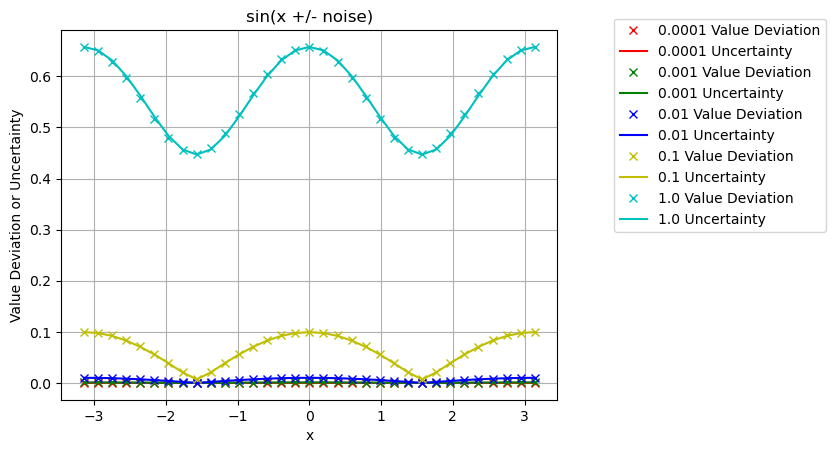

In [11]:
PlotValues()

In [12]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

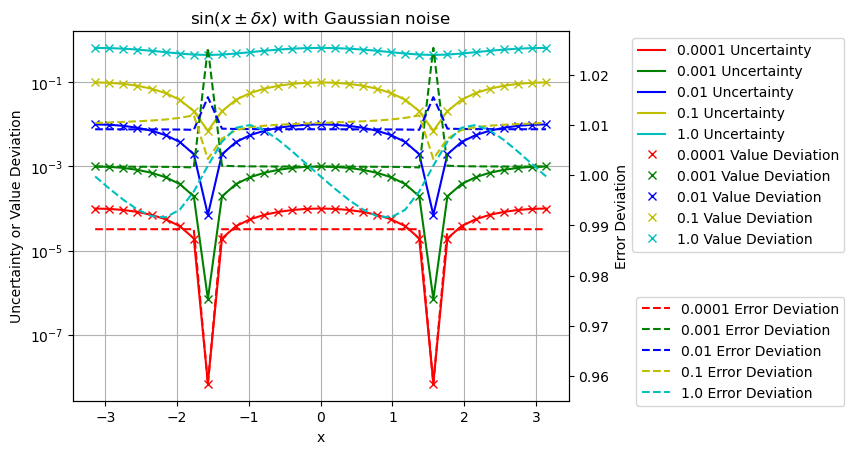

In [13]:
PlotErrorDev()

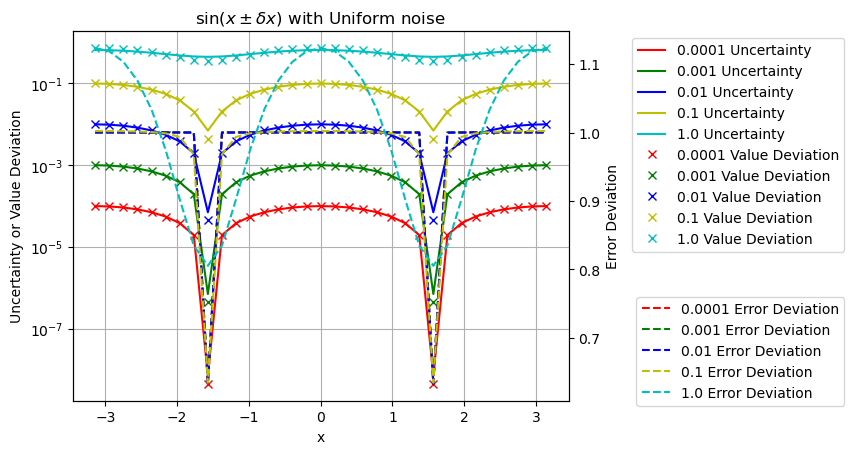

In [14]:
PlotErrorDev('Uniform')

# Mean vs Bias

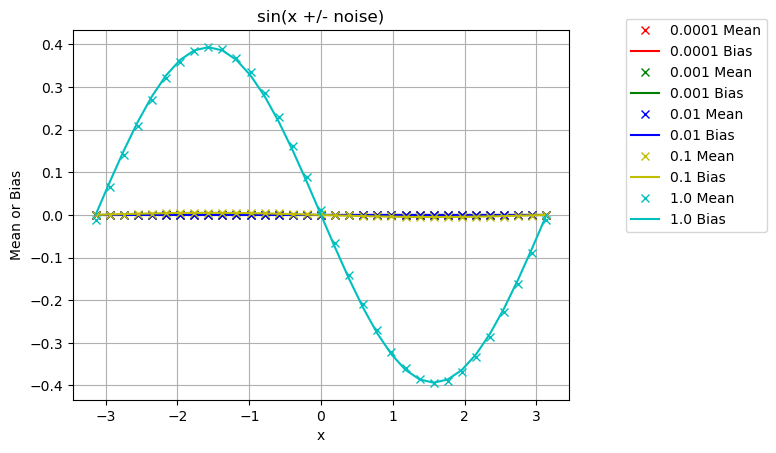

In [15]:
PlotValues(sValue=['Mean', 'Bias'])

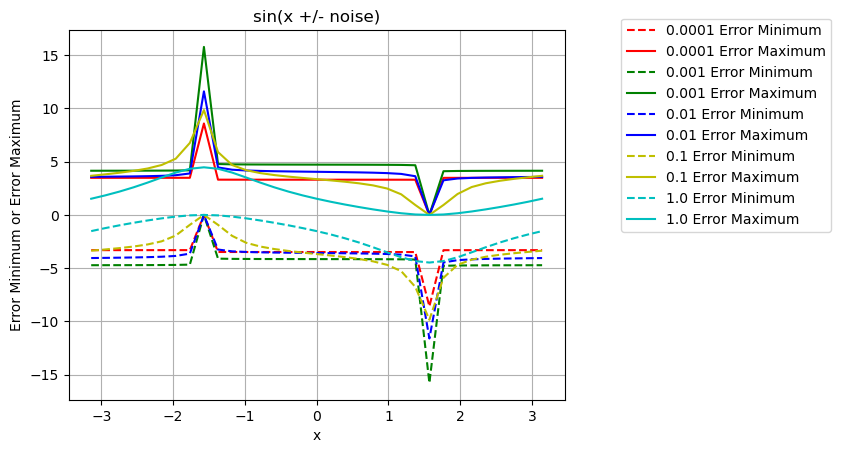

In [16]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# vs Noise vs X

In [17]:
def PlotSurface(value, noiseType):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType)]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 4)]
    ax.set_xticks(sXTick, [f'{x:.3}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

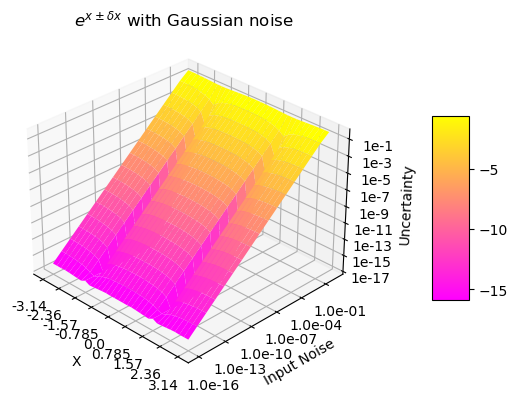

In [18]:
PlotSurface('Uncertainty', 'Gaussian')

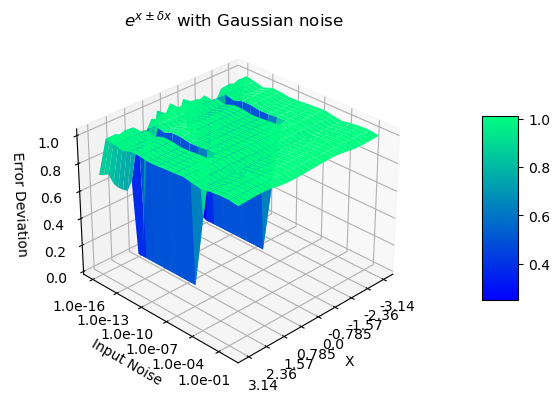

In [19]:
PlotSurface('Error Deviation', 'Gaussian')

# Histogram

In [20]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

-2.9  -2.7  -2.5  -2.3  -2.1  -1.9  -1.7      -1.5      -1.3      -1.1  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.503000  0.365500  0.298500   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.812419  0.375462  0.276472   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.351500  0.595500   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.633937  0.694431   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000   

   ...       1.1       1.3       1.5      1.7       1.9    2.1  2.3  2.5  2.7  \
0  ...  0.300500  0.344000  0.463000  0.00000  0.000000  0.000  0.0  0.0  0.0   
1  ...  0.276472  0.375462  0.812419  0.00000  0.000000  0.000  0.0  0.0  0.0   
2  ...  0.242500  0.236500  0.235000  0.32650  0.175500  0.000  0.0  0.0  0.0   
3  ...  0.220478  0.248475  0.303970  0.49645  0.264474  0.000  0.0  0.0  0.0   
4  ...  0.218000  0.196500  0.187500  0.17300  0.192000  0.306  0.0  0.0  0.0   

   2.9  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 30 columns]

In [37]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    ax = dfPlot[sHisto].T.plot(style=['g-','b-', 'y-', 'c-', 'm-', 'g--','b--', 'y--', 'c--', 'm--'])
    ax.legend(bbox_to_anchor=(1, 1))    


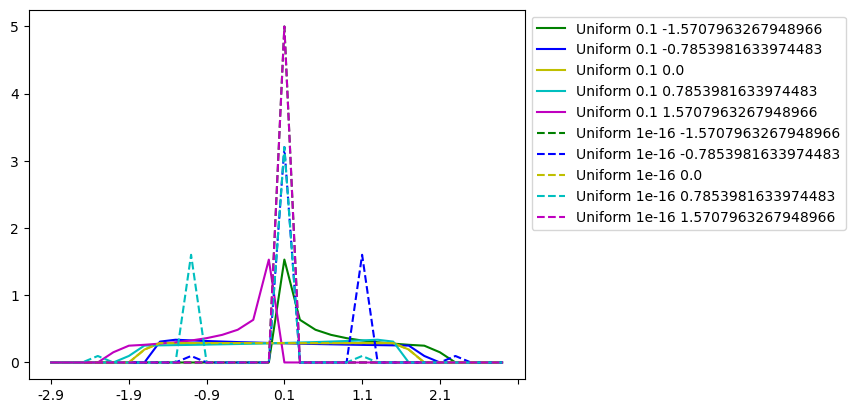

In [38]:
PlotHisto(sNoise=[1e-1, 1e-16], sX=[-math.pi/2, -math.pi/4, 0, math.pi/4, math.pi/2])

In [23]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    

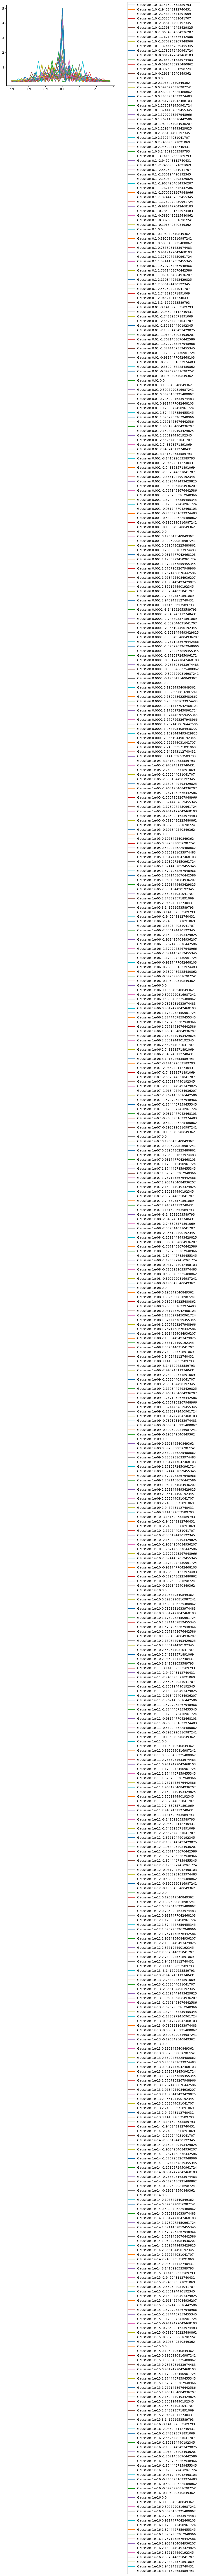

In [24]:
PlotHisto(sNoiseType=['Gaussian'])

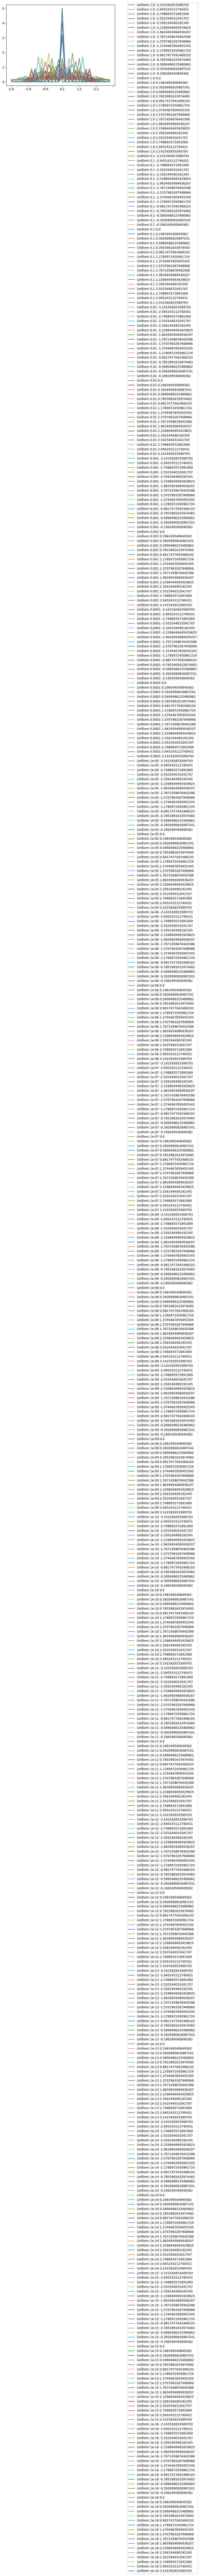

In [25]:
PlotHisto()

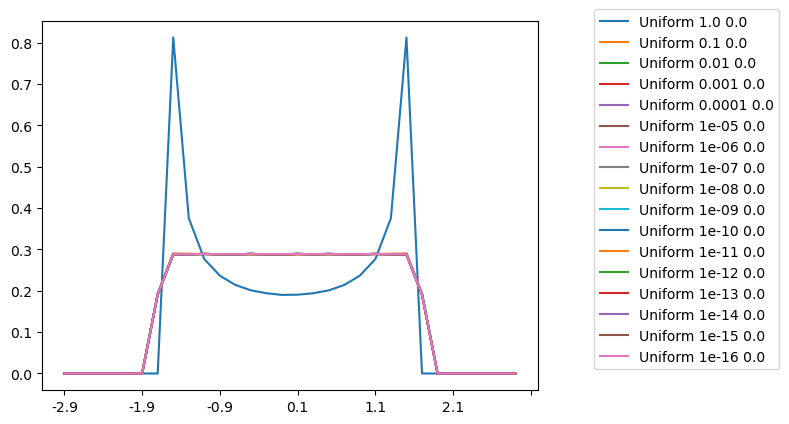

In [26]:
PlotHisto(sX=[0])

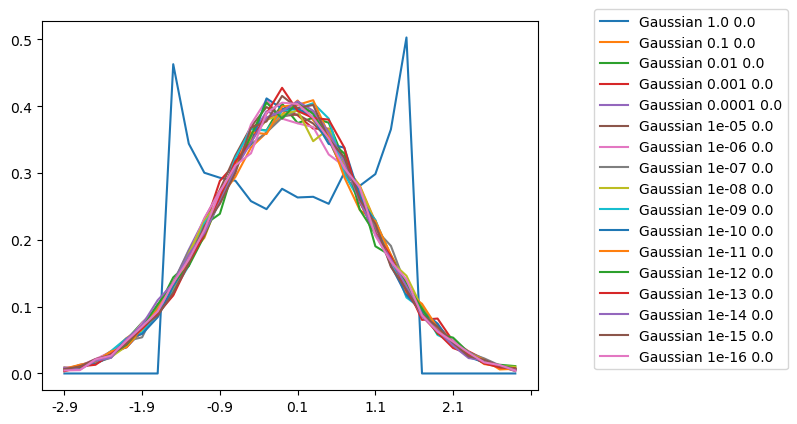

In [27]:
PlotHisto(['Gaussian'], sX=[0])

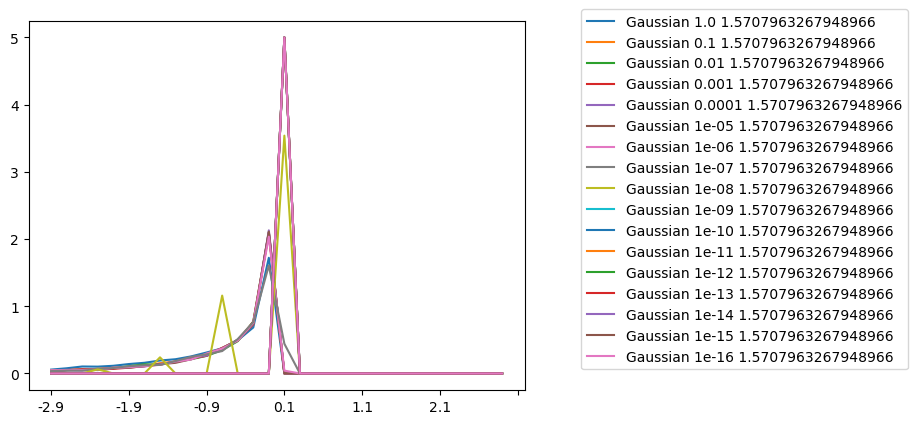

In [28]:
PlotHisto(['Gaussian'], sX=[math.pi/2])

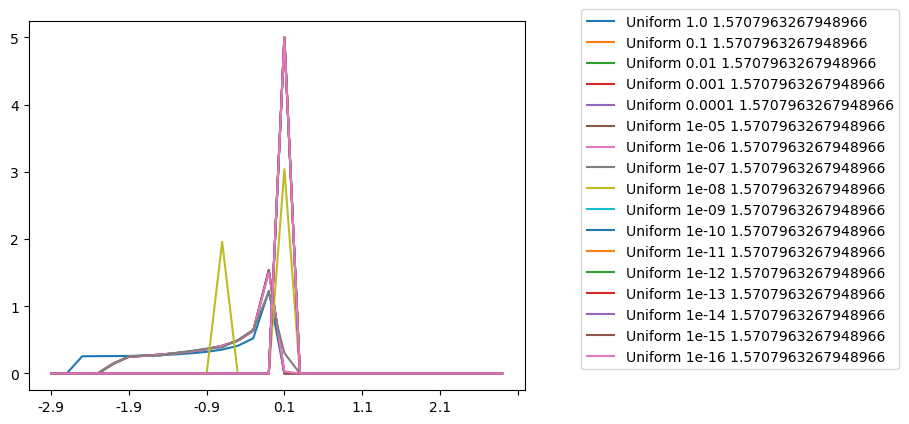

In [29]:
PlotHisto(['Uniform'], sX=[math.pi/2])

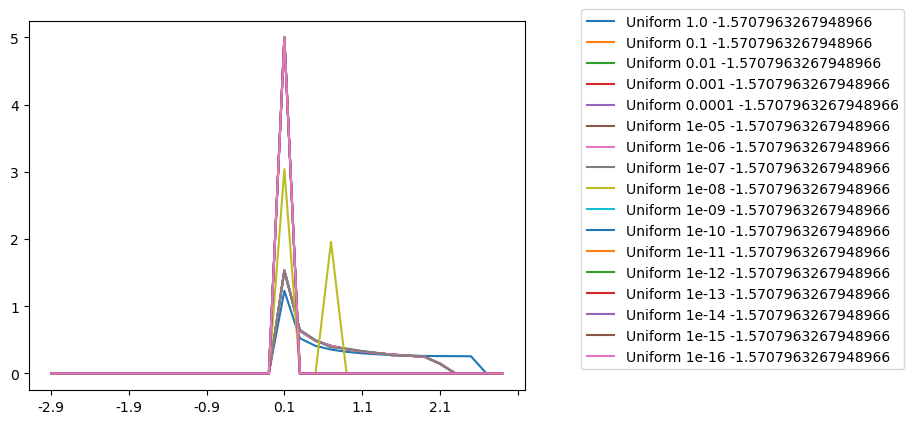

In [30]:
PlotHisto(['Uniform'], sX=[-math.pi/2])

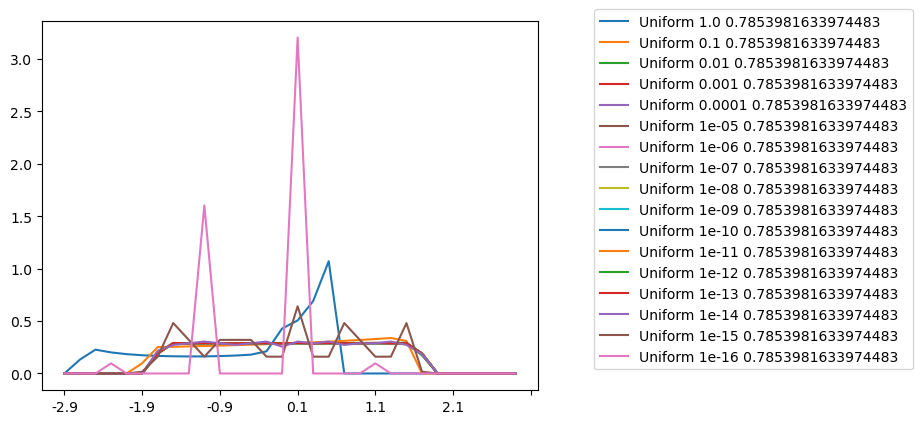

In [31]:
PlotHisto(['Uniform'], sX=[math.pi/4])

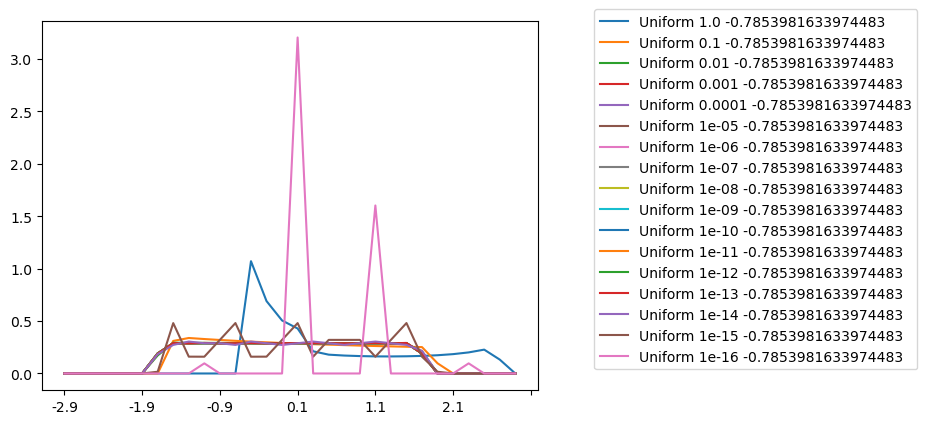

In [32]:
PlotHisto(['Uniform'], sX=[-math.pi/4])

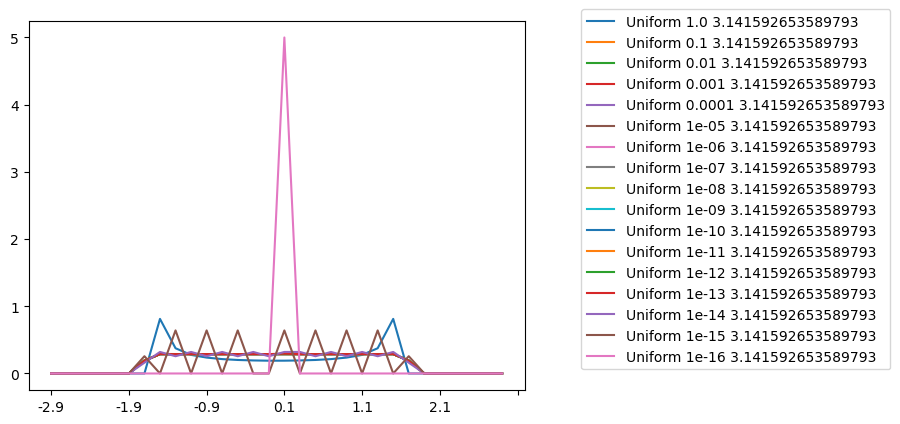

In [33]:
PlotHisto(['Uniform'], sX=[math.pi])

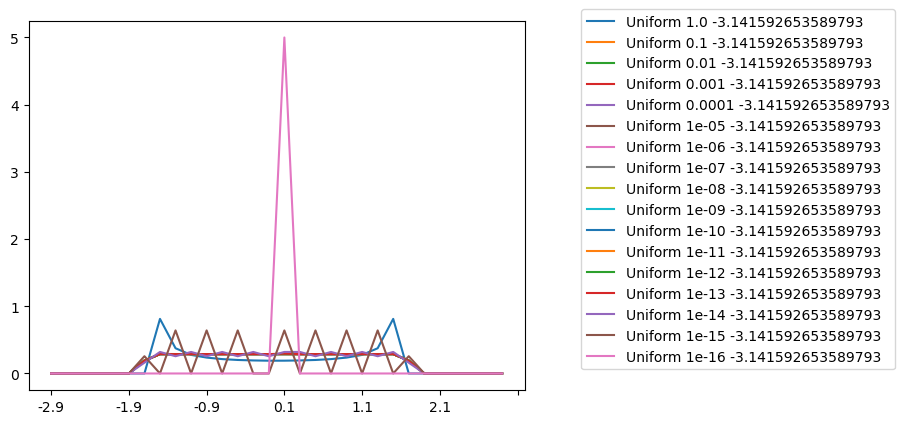

In [34]:
PlotHisto(['Uniform'], sX=[-math.pi])